In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
def count_schools(file = "Data/locations.csv",colname = "distname"):
    locations = dict()
    for block in pd.read_csv(file,chunksize=1000,iterator=True):
        for dist in block[colname]:
            if dist not in locations:
                locations[dist] = 1
            else:
                locations[dist] +=1
    return locations

In [4]:
def count_frequency(file_name ,colname_list):
    import math
    import pandas as pd
    dic_1 = dict()
    for block in pd.read_csv(file_name,chunksize=1000,iterator=True):
        for col in colname_list:
            dic_2 = dict()
            for c in block[col]:
                if pd.isna(c):
                    c = "Not Available"
                if c not in dic_2:
                    dic_2[c] = 1
                else:
                    dic_2[c] +=1
            dic_1[col] = dic_2
    return dic_1

In [1]:
def get_header(file_name):
    import csv
    with open(file_name) as csvfile:
        reader = csv.DictReader(csvfile)
        lst = next(reader).keys()
    return lst

# Checking Trends in increase in the schools over the years

## Get the year of establishment column of the schools

In [6]:
basic_file = "/home/flash/Desktop/Basics.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
header = get_header("/home/flash/Desktop/data_analysis/School_14-15/maharashtra/data_mining_table.csv")

In [12]:
import re

a = filter(lambda x: re.search('urinal*',x),header)

In [13]:
a

['urinals_b', 'urinals_g']

In [10]:
year_of_establishment = []
for chunk in pd.read_csv(basic_file,iterator=True,parse_dates=True,chunksize=1000):
    year_of_establishment = np.append(year_of_establishment,chunk['ESTDYEAR'])

In [11]:
year_of_establishment.sort()

In [12]:
year_of_establishment

array([   9., 1723., 1723., ...,   nan,   nan,   nan])

In [13]:
df = pd.DataFrame(year_of_establishment,columns=['Year'])

In [14]:
df.describe()

Year
count  106486.000000
mean     1973.549039
std        30.542217
min         9.000000
25%      1956.000000
50%      1978.000000
75%      1999.000000
max      2014.000000

In [15]:
(1999-1956)*1.5

64.5

In [16]:
from collections import Counter

# Calculating No. of schools in each district over the years

In [17]:
def school_dist_years(basic_file,dist_list):
    import numpy as np
    year_of_establishment = []
    for dist in dist_list:
        for chunk in pd.read_csv(basic_file,iterator=True,parse_dates=True,chunksize=1000):
            chunk = chunk[chunk['DISTNAME']==dist]
            year_of_establishment = np.append(year_of_establishment,chunk['ESTDYEAR'])
        yield year_of_establishment,str(dist)
        year_of_establishment = []

In [18]:
from __future__ import division
def ecdf(lst):
    n = len(lst)
    x = np.sort(lst)
    y = np.arange(1,n+1)/n
    return x,y

In [19]:
x,y = ecdf(df)

In [55]:
districts = ['RATNAGIRI',
 'NANDURBAR',
 'SOLAPUR',
 'PALGHAR',
 'CHANDRAPUR',
 'AMRAVATI',
 'NASHIK',
 'DHULE',
 'AHMADNAGAR',
 'PUNE',
 'AURANGABAD (MAHARASHTRA)',
 'BID',
 'GADCHIROLI',
 'NAGPUR',
 'WARDHA',
 'KOLHAPUR',
 'SANGLI',
 'NANDED',
 'BHANDARA',
 'MUMBAI II',
 'JALGAON',
 'THANE',
 'GONDIYA',
 'OSMANABAD',
 'PARBHANI',
 'MUMBAI (SUBURBAN)',
 'RAIGARH (MAHARASHTRA)',
 'YAVATMAL',
 'AKOLA',
 'SATARA',
 'SINDHUDURG',
 'WASHIM',
 'HINGOLI',
 'JALNA',
 'LATUR',
 'BULDANA']

In [56]:
basic_file="/home/flash/Desktop/Basics.csv"
a = school_dist_years(basic_file,districts)

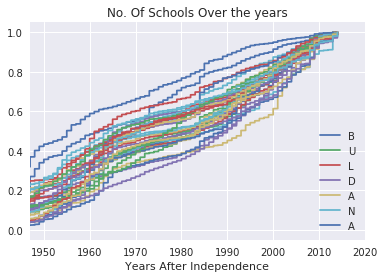

In [22]:
import seaborn as sn
sn.set()
sn.choose_cubehelix_palette
for lst,dist in a:
    x,y=ecdf(lst)
    plt.plot(x,y);
    plt.xlim(1947,2020)
    plt.xlabel("Years After Independence")
    plt.title("No. Of Schools Over the years")
    plt.legend(dist)

plt.show()

RATNAGIRI


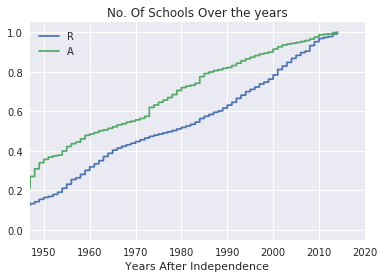

NANDURBAR


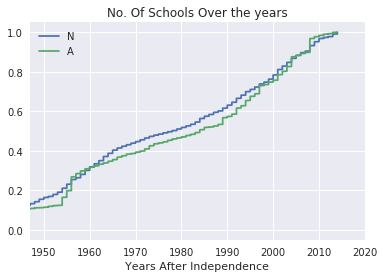

SOLAPUR


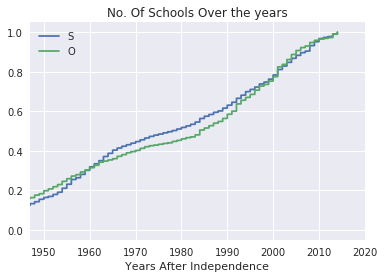

PALGHAR


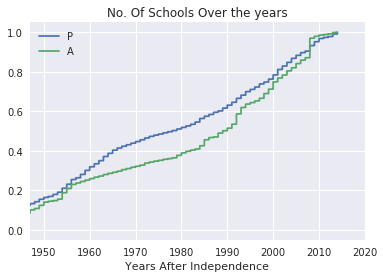

CHANDRAPUR


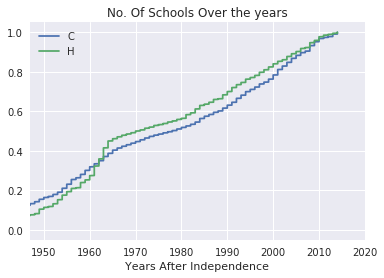

AMRAVATI


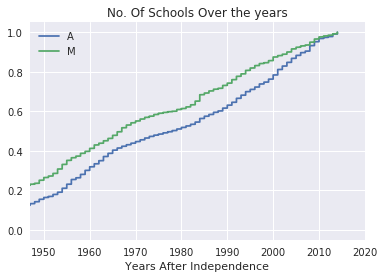

NASHIK


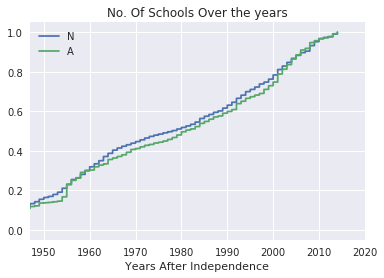

DHULE


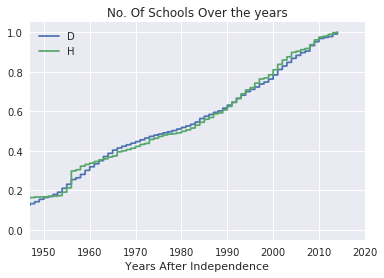

AHMADNAGAR


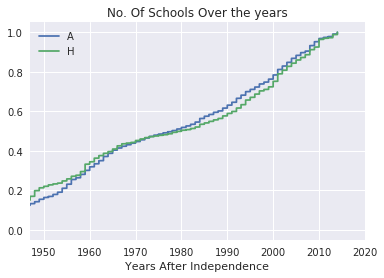

PUNE


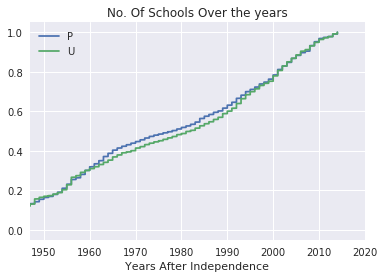

AURANGABAD (MAHARASHTRA)


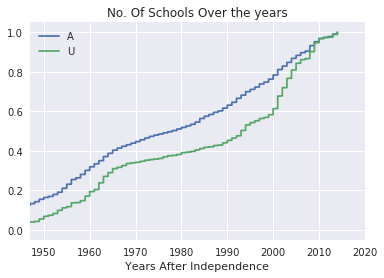

BID


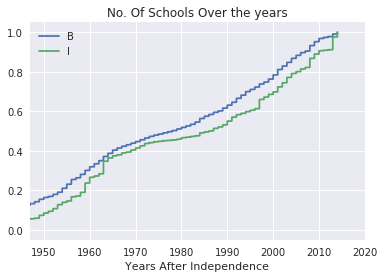

GADCHIROLI


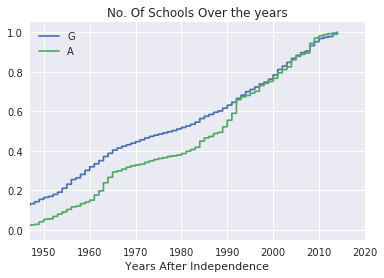

NAGPUR


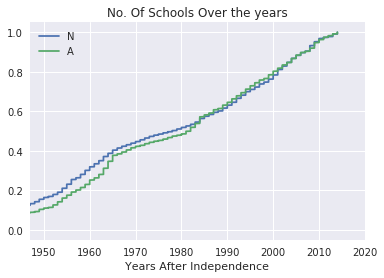

WARDHA


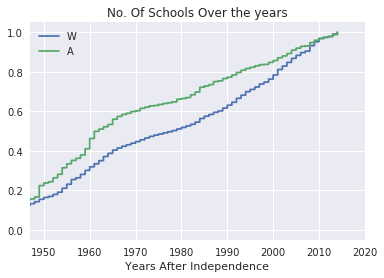

KOLHAPUR


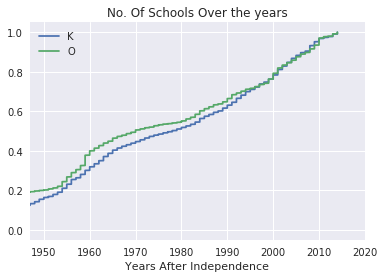

SANGLI


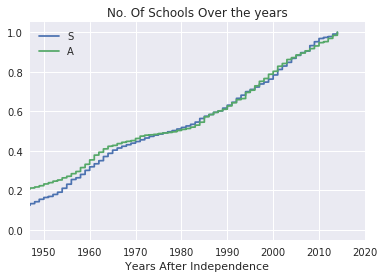

NANDED


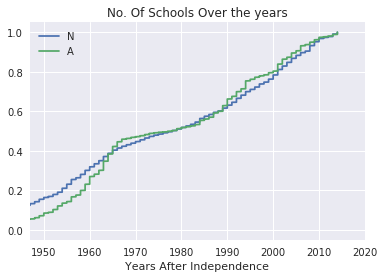

BHANDARA


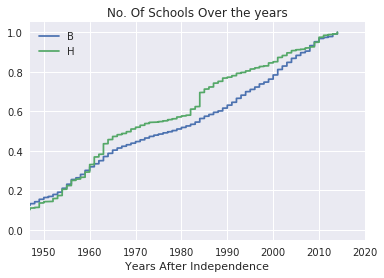

MUMBAI II


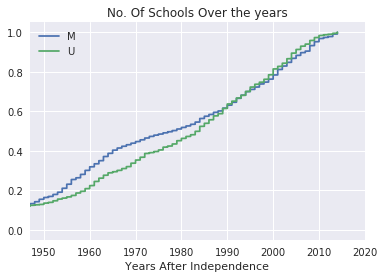

JALGAON


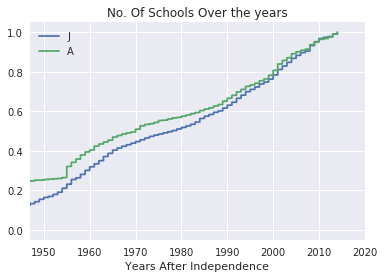

THANE


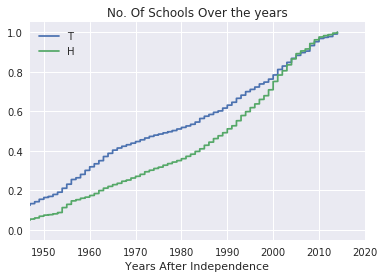

GONDIYA


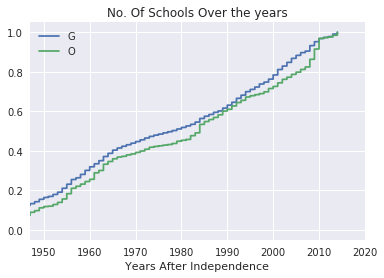

OSMANABAD


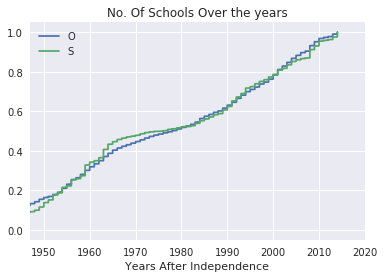

PARBHANI


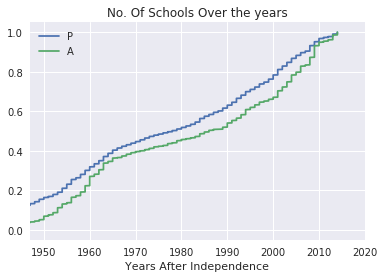

MUMBAI (SUBURBAN)


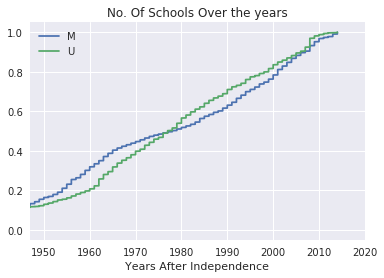

RAIGARH (MAHARASHTRA)


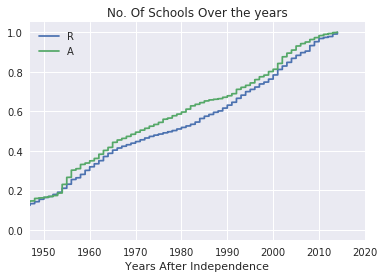

YAVATMAL


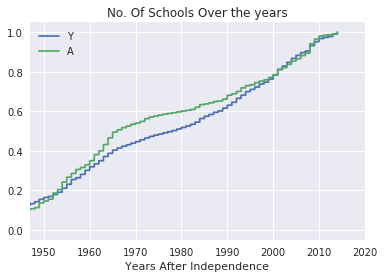

AKOLA


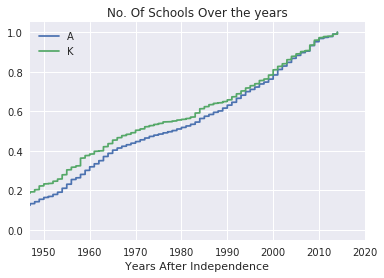

SATARA


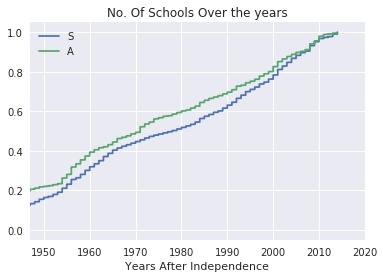

SINDHUDURG


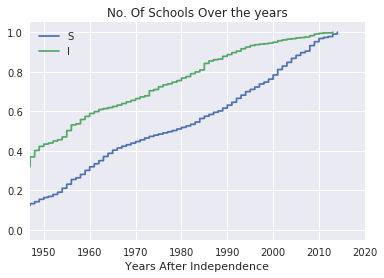

WASHIM


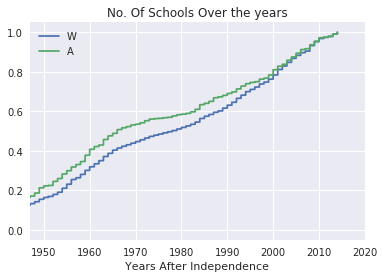

HINGOLI


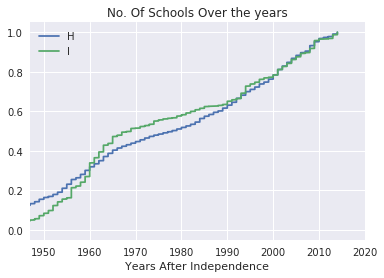

JALNA


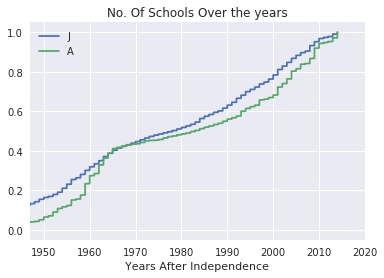

LATUR


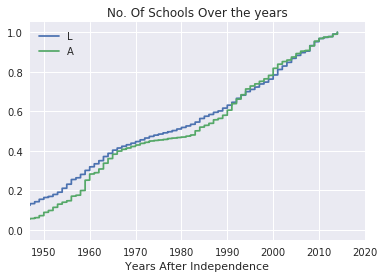

BULDANA


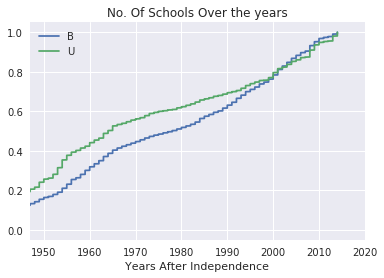

In [23]:
#Plotting and comparing the increase rate with the global trend in growth
x_all,y_all = ecdf(df)
a = school_dist_years(basic_file,districts)
import seaborn as sn
sn.set()
sn.choose_cubehelix_palette
for lst,dist in a:
    print(dist)
    x,y=ecdf(lst)
    _ = plt.plot(x_all,y_all)
    _ = plt.legend("Over All")
    _ = plt.plot(x,y);
    _ = plt.xlim(1947,2020)
    _ = plt.xlabel("Years After Independence")
    _ = plt.title("No. Of Schools Over the years")
    _ = plt.legend(dist)
    plt.show()

## Extracting Data for each District

In [24]:
basic_file

'/home/flash/Desktop/Basics.csv'

In [61]:
type(districts)

list

In [183]:
def get_district_wise_data(file_name,district_names):
    import pandas as pd
    dist_info = dict()
    for dist in district_names:
        for chunk in pd.read_csv(file_name,iterator=True,chunksize=1000):
            dist_chunk =chunk[chunk["DISTNAME"]==dist]
            
            if not dist_chunk.empty:
                if dist not in dist_info:
                    dist_info[dist] = dist_chunk
            
                else:
                    dist_info[dist].append(dist_chunk,ignore_index=True)
            
        yield dist_info[dist],dist
        #yield dist_info[dist],dist
        dist_info = {}

In [184]:
districts[:5]

['RATNAGIRI', 'NANDURBAR', 'SOLAPUR', 'PALGHAR', 'CHANDRAPUR']

In [185]:
dist_info = get_district_wise_data(basic_file,districts)

In [200]:
df_bid,dist = next(dist_info)

In [203]:
df_bid

STATNAME DISTNAME  BLOCK_NAME        SCHCD  AC_YEAR  \
691  Maharashtra    DHULE       SAKRI  27020230401  2014-15   
693  Maharashtra    DHULE  SHINDKHEDA  27020300102  2014-15   
710  Maharashtra    DHULE  SHINDKHEDA  27020301901  2014-15   
715  Maharashtra    DHULE       SAKRI  27020201001  2014-15   
799  Maharashtra    DHULE       SAKRI  27020214803  2014-15   
802  Maharashtra    DHULE       SAKRI  27020218704  2014-15   
806  Maharashtra    DHULE       SAKRI  27020206701  2014-15   
811  Maharashtra    DHULE       SAKRI  27020226702  2014-15   

                         SCHNAME  RURURB HABITATION_NAME      VILLAGE  \
691                  Z.P. SCHOOL       1             NaN     KADUPADA   
693  Z.P. SCHOOL NO. 2 URDU BOYS       1    VARPADE ROAD   SHINDKHEDA   
710                  Z.P. SCHOOL       1        WALKHEDA     WALKHEDA   
715                  Z.P. SCHOOL       1             NaN  CHADWEL (P)   
799  DR. SH. MUKARJI HIGH SCHOOL       1             NaN      MAIDANE   
802      Z.P. SCHOOL NO. 2 GIRLS       1             NaN    PIMPALNER   
806                  Z.P. SCHOOL       1             NaN     NILGAVAN   
811   Z.P. NEW SCHOOL MARUTIPADA       1             NaN     KHARGAON   

       PANCHAYAT     ...      CAL_YN MEDCHK_YN RAMPSNEEDED_YN  RAMPS_YN  \
691    NANDARKHI     ...           2         1              2         1   
693   SHINDKHEDA     ...           2         1              1         1   
710     WALKHEDA     ...           2         1              2         1   
715  CHADWEL (P)     ...           2         1              2         1   
799      MAIDANE     ...           2         1              2         1   
802    PIMPALNER     ...           2         1              2         1   
806     NILGAVAN     ...           1         1              2         1   
811     KHARGAON     ...           2         1              1         1   

    HANDRAILS  CAMPUSPLAN_YN HOSTELB_YN HOSTELBOYS  HOSTELG_YN  HOSTELGIRLS  
691         1              1          2          0           2            0  
693         1              1          2          0           2            0  
710         1              2          2          0           2            0  
715         1              1          2          0           2            0  
799         1              1          2          0           2            0  
802         0              2          2          0           2            0  
806         1              1          2          0           2            0  
811         2              1          2          0           2            0  

[8 rows x 270 columns]